In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('..'))
os.chdir(os.path.dirname(sys.path[0])) # Este comando hace que el notebook sea la ruta principal y poder trabajar en cascada

In [2]:
from utils.funcion import *

In [3]:
fifa =pd.read_csv('src/data/processed/fifa_clasificacion_habilidad.csv')

In [4]:
fifa_gk = pd.read_csv('src/data/processed/fifa_gk_clasificacion_habilidad.csv')

In [5]:
fifa.head()

,Name,Age,Height,Weight,Overall,Potential,WeakFoot,SkillMoves,PaceTotal,ShootingTotal,...,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,Clasificación Habilidad
0,L. Messi,35,169,67,91,91,4,4,81,89,...,0,0,0,0,0,0,0,0,0,Alta
1,K. Benzema,34,185,81,91,91,4,4,80,88,...,0,0,0,0,0,0,0,0,0,Alta
2,R. Lewandowski,33,185,81,91,91,4,4,75,91,...,0,0,0,0,0,0,0,0,1,Alta
3,K. De Bruyne,31,181,70,91,91,5,4,74,88,...,0,0,0,0,0,0,0,0,0,Alta
4,K. Mbappé,23,182,73,91,95,4,5,97,89,...,0,0,0,0,0,0,0,0,1,Alta


In [7]:
fifa['Clasificación Habilidad'].unique()

array(['Alta', 'Baja'], dtype=object)

In [8]:
fifa["Clasificación Habilidad"] = fifa["Clasificación Habilidad"].map({ "Baja": 0, "Alta": 1})

In [9]:
fifa_gk["Clasificación Habilidad"] = fifa_gk["Clasificación Habilidad"].map({ "Baja": 0, "Alta": 1})

In [10]:
fifa["Clasificación Habilidad"].value_counts()


Clasificación Habilidad
1    8507
0    7860
Name: count, dtype: int64

In [11]:
fifa_gk["Clasificación Habilidad"].value_counts()


Clasificación Habilidad
0    1058
1     995
Name: count, dtype: int64

In [12]:
# Obtiene las columnas que se deben escalar (todas excepto 'Name' y 'Cluster')
columns_to_scale = fifa.columns.difference(['Name'])

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplica el escalado solo a las columnas seleccionadas
fifa[columns_to_scale] = scaler.fit_transform(fifa[columns_to_scale])

# Ahora, las columnas han sido escaladas en el rango [0, 1], conservando el DataFrame original.

#### Filtrar las características relevantes (posiciones) y normalizar los datos
#### Definir el número de clusters (número de posiciones en el campo)
#### Crear y entrenar el modelo K-means
#### Asignar las etiquetas de los clusters a los jugadores
#### Agregar las etiquetas de los clusters al DataFrame original

In [13]:
fifa.columns

Index(['Name', 'Age', 'Height', 'Weight', 'Overall', 'Potential', 'WeakFoot',
       'SkillMoves', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'BMI', 'CB', 'CDM', 'CF',
       'CM', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST',
       'Clasificación Habilidad'],
      dtype='object')

In [14]:
posiciones = fifa[['CB', 'CDM', 'CF','CM', 'LB', 'LM', 'LW', 
                   'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST',]]

In [15]:
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(posiciones)

numero_clusters = len(posiciones.columns)

In [16]:
modelo = KMeans(n_clusters=numero_clusters)
modelo.fit(datos_normalizados)

etiquetas_clusters = modelo.labels_

fifa['Cluster'] = etiquetas_clusters
fifa.head()


,Name,Age,Height,Weight,Overall,Potential,WeakFoot,SkillMoves,PaceTotal,ShootingTotal,...,LM,LW,LWB,RB,RM,RW,RWB,ST,Clasificación Habilidad,Cluster
0,L. Messi,0.76,0.274510,0.339623,1.0,0.914894,0.75,0.666667,0.768116,0.960526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,K. Benzema,0.72,0.588235,0.603774,1.0,0.914894,0.75,0.666667,0.753623,0.947368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11
2,R. Lewandowski,0.68,0.588235,0.603774,1.0,0.914894,0.75,0.666667,0.681159,0.986842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4
3,K. De Bruyne,0.60,0.509804,0.396226,1.0,0.914894,1.00,0.666667,0.666667,0.947368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,K. Mbappé,0.28,0.529412,0.452830,1.0,1.000000,0.75,1.000000,1.000000,0.960526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4


In [17]:
posiciones_gk = fifa_gk[['GK']]

In [18]:
scaler_gk = StandardScaler()
datos_normalizados_gk = scaler_gk.fit_transform(posiciones_gk)

numero_clusters_gk = len(posiciones_gk.columns)

In [19]:
modelo_gk = KMeans(n_clusters=numero_clusters)
modelo_gk.fit(datos_normalizados_gk)

etiquetas_clusters_gk = modelo_gk.labels_

fifa_gk['Cluster'] = etiquetas_clusters_gk
fifa_gk.head()

,Name,Age,Height,Weight,Overall,Potential,BestPosition,WeakFoot,SkillMoves,PaceTotal,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI,GK,Clasificación Habilidad,Cluster
0,T. Courtois,30,199,96,90,91,GK,3,1,84,...,16,84,89,75,89,90,24.241812,1,1,0
1,M. Neuer,36,193,93,90,90,GK,4,1,87,...,11,87,88,91,91,88,24.967113,1,1,0
2,J. Oblak,29,188,87,89,91,GK,3,1,86,...,18,86,90,78,87,89,24.615211,1,1,0
3,Ederson,28,188,86,89,91,GK,3,1,87,...,8,87,82,93,88,88,24.332277,1,1,0
4,Alisson,29,191,91,89,90,GK,3,1,86,...,16,86,85,85,90,89,24.944492,1,1,0


In [20]:
# Iterar sobre cada cluster y mostrar los jugadores correspondientes
for cluster_id in range(numero_clusters):
    print(f"Jugadores en el Cluster {cluster_id}:")
    jugadores_cluster = fifa[fifa['Cluster'] == cluster_id][['Name', 'Overall']]
    print(jugadores_cluster)
    print('\n')


 

Jugadores en el Cluster 0:
                Name   Overall
11          Casemiro  0.954545
13        J. Kimmich  0.954545
14          N. Kanté  0.954545
23             Rodri  0.909091
24           Fabinho  0.909091
...              ...       ...
16338  Zhao Yuezheng  0.022727
16347     Du Zhixuan  0.022727
16348   Chen Keqiang  0.022727
16359       Liao Wei  0.022727
16363   Yang Dejiang  0.000000

[1396 rows x 2 columns]


Jugadores en el Cluster 1:
                  Name   Overall
0             L. Messi  1.000000
7          V. van Dijk  0.977273
15          Rúben Dias  0.931818
17      Bernardo Silva  0.931818
19          Marquinhos  0.931818
...                ...       ...
16353  J. Russell-Rowe  0.022727
16357        Guo Yunqi  0.022727
16361        Pi Ziyang  0.000000
16362       D. Collins  0.000000
16365     D. McCallion  0.000000

[5922 rows x 2 columns]


Jugadores en el Cluster 2:
                      Name   Overall
3             K. De Bruyne  1.000000
20                T. Kr

In [21]:
# Obtener el número de clusters presentes en el DataFrame
numero_clusters = fifa['Cluster'].nunique()

# Iterar sobre cada cluster y mostrar los 10 mejores jugadores de cada uno
for cluster_id in range(numero_clusters):
    print(f"Mejores jugadores en el Cluster {cluster_id}:")
    
    # Filtrar los datos correspondientes al cluster actual y ordenar por 'Clasificación Habilidad' en orden descendente
    jugadores_cluster = fifa[fifa['Cluster'] == cluster_id].sort_values(by='Overall', ascending=False)
    
    # Mostrar solo los 10 mejores jugadores del cluster actual
    top_10_jugadores = jugadores_cluster.head(20)[['Name', 'Overall']]
    print(top_10_jugadores)
    print('\n')


Mejores jugadores en el Cluster 0:
                Name   Overall
11          Casemiro  0.954545
14          N. Kanté  0.954545
13        J. Kimmich  0.954545
23             Rodri  0.909091
24           Fabinho  0.909091
44       M. Brozović  0.886364
58   Sergio Busquets  0.863636
82         T. Partey  0.840909
111        S. Tonali  0.840909
122          D. Rice  0.840909
126        F. Kessié  0.840909
153          R. Kent  0.818182
164         Fernando  0.818182
139        K. Laimer  0.818182
146      P. Højbjerg  0.818182
202    A. Tchouaméni  0.795455
216         I. Gueye  0.795455
233     G. Kondogbia  0.795455
279     G. Rodríguez  0.772727
322      L. Torreira  0.772727


Mejores jugadores en el Cluster 1:
               Name   Overall
0          L. Messi  1.000000
7       V. van Dijk  0.977273
15       Rúben Dias  0.931818
17   Bernardo Silva  0.931818
19       Marquinhos  0.931818
22       A. Rüdiger  0.909091
25        T. Müller  0.909091
29     K. Koulibaly  0.909091
42     

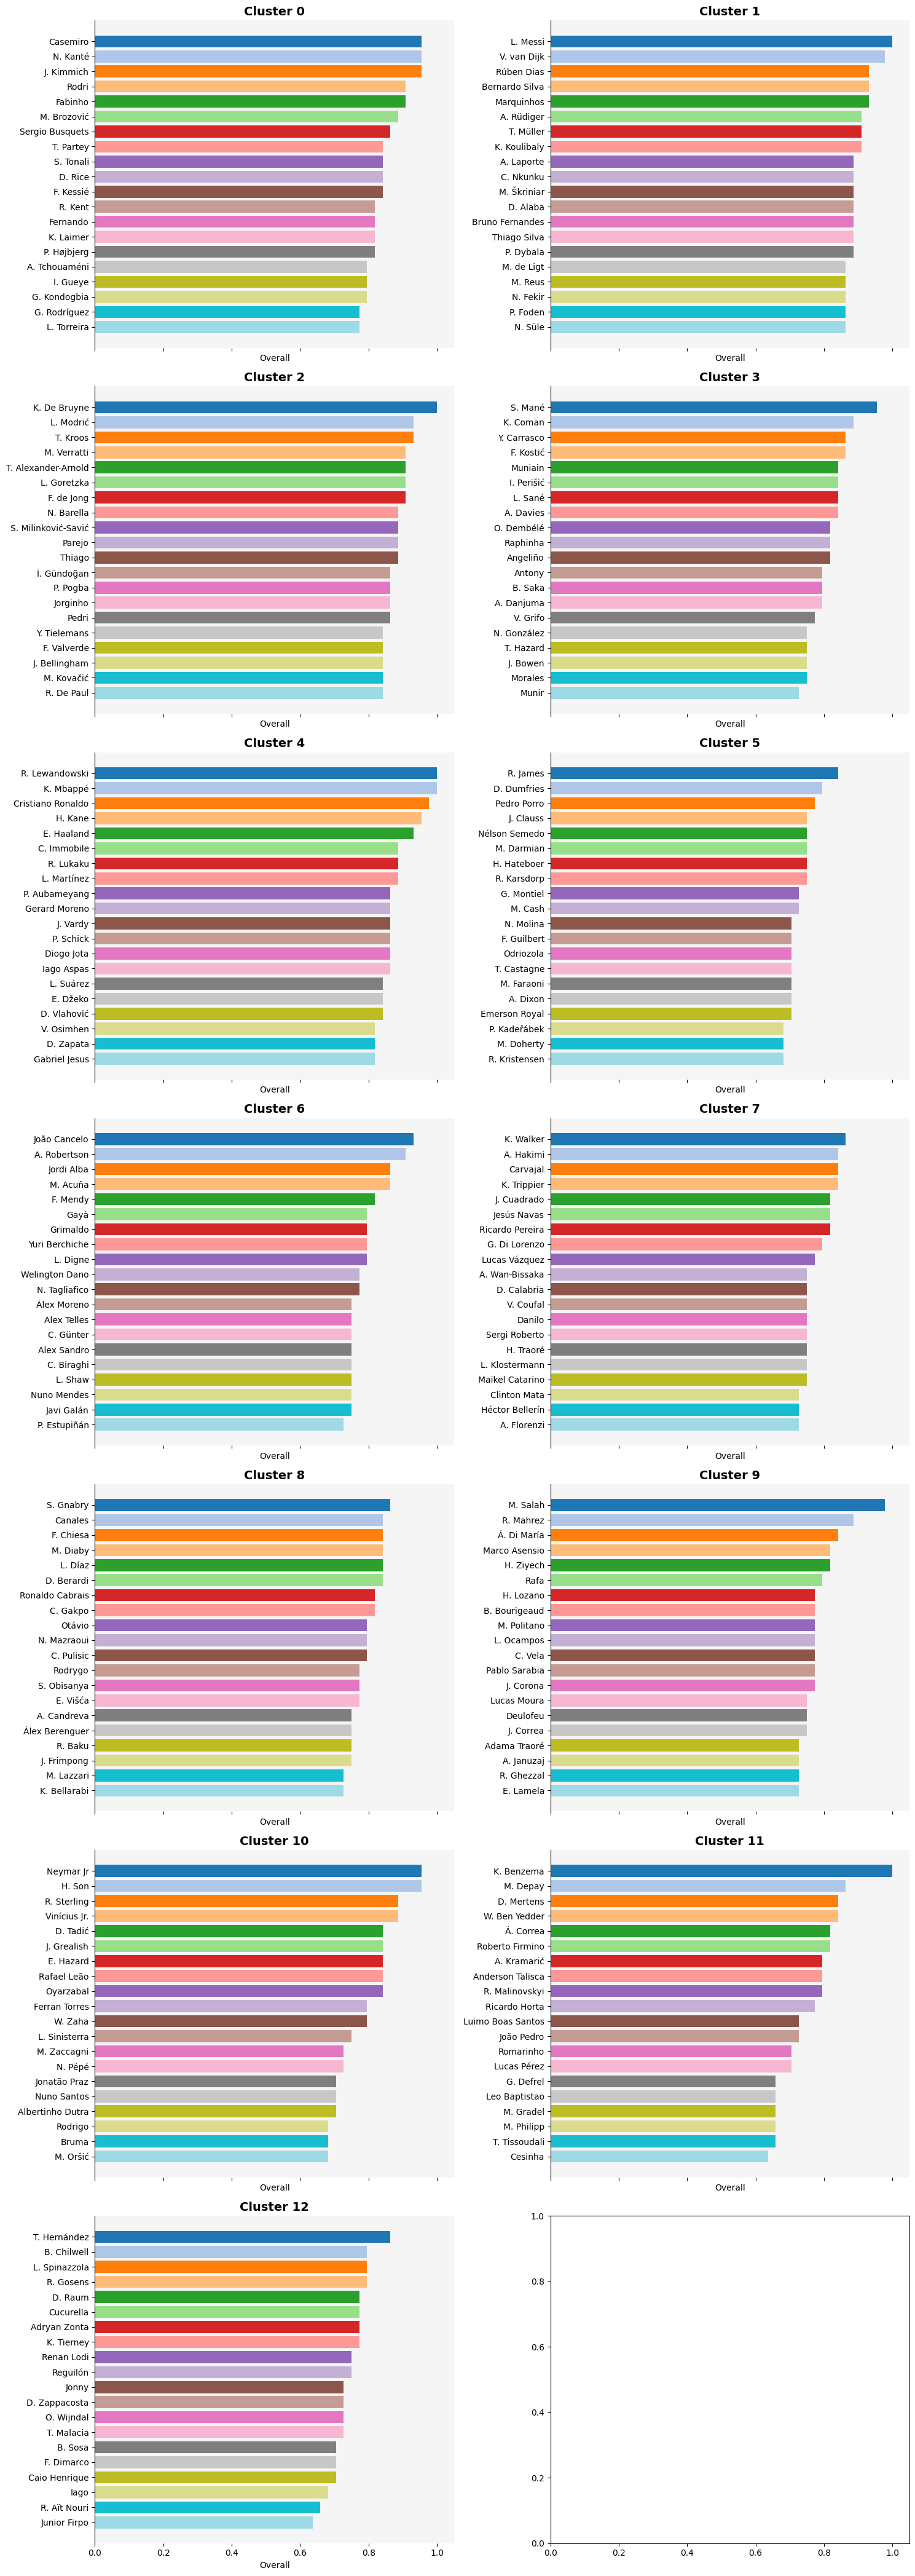

In [60]:
# Obtener el número de clusters presentes en el DataFrame
numero_clusters = fifa['Cluster'].nunique()

# Calcular el número de filas y columnas para la disposición de subplots
num_filas = (numero_clusters + 1) // 2  # Dividir y redondear hacia arriba
num_columnas = 2

# Crear una figura con subplots para mostrar cada gráfica de cada cluster
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 6*num_filas), sharex=True)

# Definir un esquema de colores para los jugadores en todas las gráficas
colores = sns.color_palette('tab20', n_colors=20)

# Iterar sobre cada cluster y generar una gráfica para los 10 mejores jugadores de cada uno
for cluster_id in range(numero_clusters):
    # Filtrar los datos correspondientes al cluster actual y ordenar por 'Overall' en orden descendente
    jugadores_cluster = fifa[fifa['Cluster'] == cluster_id].sort_values(by='Overall', ascending=False)
    
    # Seleccionar solo los 10 mejores jugadores del cluster actual
    top_10_jugadores = jugadores_cluster.head(20)
    
    # Calcular la posición del subplot en la disposición de 2x4
    fila = cluster_id // num_columnas
    columna = cluster_id % num_columnas
    
    # Crear la gráfica de barras horizontal para los 10 mejores jugadores del cluster actual
    axs[fila, columna].barh(top_10_jugadores['Name'], top_10_jugadores['Overall'], color=colores)
    axs[fila, columna].set_xlabel('Overall')
    axs[fila, columna].set_title(f'Cluster {cluster_id}', fontsize=14, fontweight='bold')
    axs[fila, columna].invert_yaxis()  # Invertir el eje y para que los jugadores mejor clasificados estén en la parte superior
    
    # Eliminar los bordes innecesarios en cada subplot
    axs[fila, columna].spines['top'].set_visible(False)
    axs[fila, columna].spines['right'].set_visible(False)
    axs[fila, columna].spines['bottom'].set_visible(False)
    
    # Añadir un fondo gris claro a cada subplot
    axs[fila, columna].set_facecolor('#F5F5F5')

# Ajustar los espacios entre las gráficas para que no se superpongan
plt.tight_layout()

# Mostrar la gráfica
plt.show();


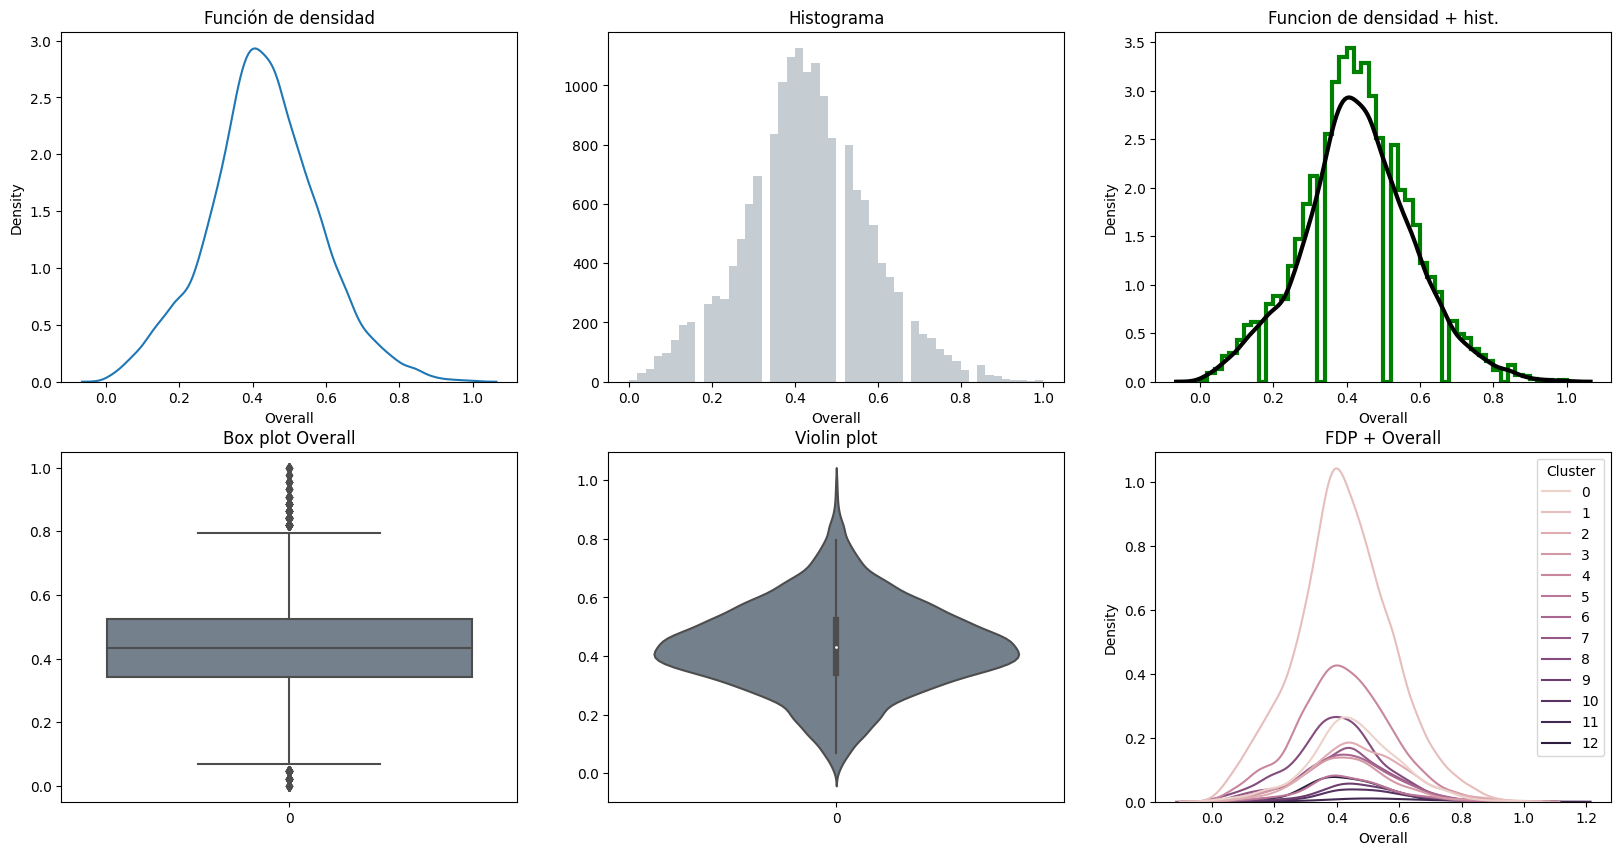

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Funcion de densidad
sns.distplot(fifa['Overall'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")

# Histograma
sns.distplot(fifa['Overall'],
             kde=False,
             color='slategray',
             ax=axes[0, 1]);

axes[0, 1].set_title("Histograma")

# Funcion de densidad + histograma
sns.distplot(fifa['Overall'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 2])


axes[0, 2].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(fifa['Overall'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot Overall")

# Violin plot
sns.violinplot(fifa['Overall'], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")


# Funcion de densidad + Clasificación Habilidad
sns.kdeplot(data=fifa, x='Overall', hue = 'Cluster', ax=axes[1, 2])
axes[1, 2].set_title("FDP + Overall");

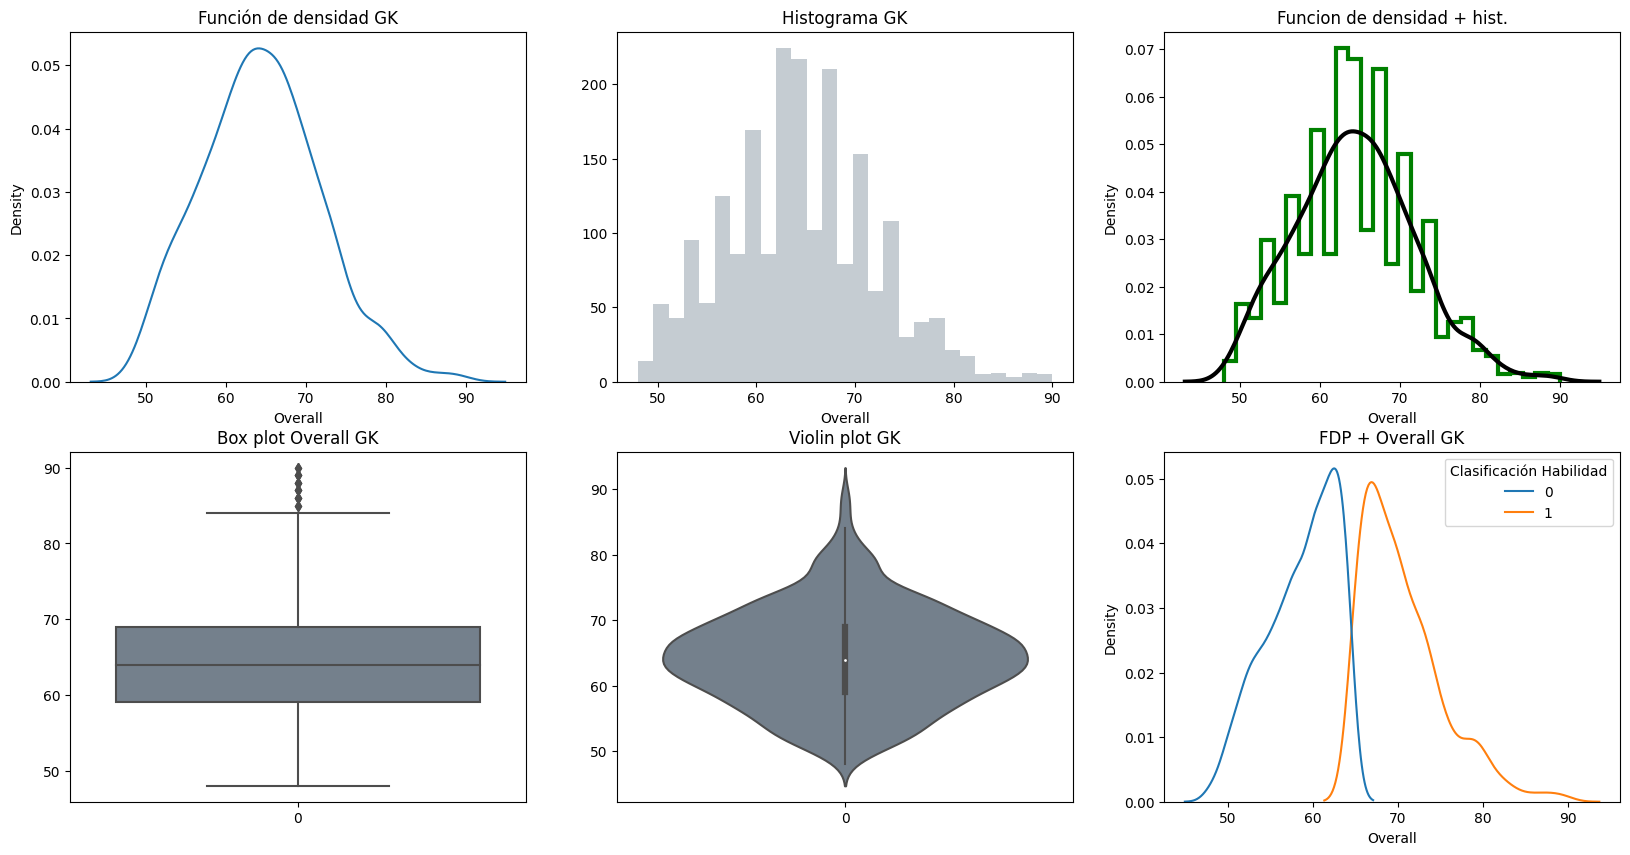

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Funcion de densidad
sns.distplot(fifa_gk['Overall'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad GK")

# Histograma
sns.distplot(fifa_gk['Overall'],
             kde=False,
             color='slategray',
             ax=axes[0, 1]);

axes[0, 1].set_title("Histograma GK")

# Funcion de densidad + histograma
sns.distplot(fifa_gk['Overall'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 2])


axes[0, 2].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(fifa_gk['Overall'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot Overall GK")

# Violin plot
sns.violinplot(fifa_gk['Overall'], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot GK")


# Funcion de densidad + Clasificación Habilidad
sns.kdeplot(data=fifa_gk, x='Overall', hue = 'Clasificación Habilidad', ax=axes[1, 2])
axes[1, 2].set_title("FDP + Overall GK");

In [25]:
data_report(fifa)

COL_N,Name,Age,Height,Weight,Overall,Potential,WeakFoot,SkillMoves,PaceTotal,ShootingTotal,...,LM,LW,LWB,RB,RM,RW,RWB,ST,Clasificación Habilidad,Cluster
DATA_TYPE,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,15613,26,49,51,45,48,5,4,70,74,...,2,2,2,2,2,2,2,2,2,13
CARDIN (%),95.39,0.16,0.3,0.31,0.27,0.29,0.03,0.02,0.43,0.45,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.08


In [26]:
data_report(fifa_gk)

COL_N,Name,Age,Height,Weight,Overall,Potential,BestPosition,WeakFoot,SkillMoves,PaceTotal,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI,GK,Clasificación Habilidad,Cluster
DATA_TYPE,object,int64,int64,int64,int64,int64,object,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,float64,int64,int64,int32
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2041,28,32,42,43,42,1,5,1,47,...,20,47,46,50,53,46,474,1,2,1
CARDIN (%),99.42,1.36,1.56,2.05,2.09,2.05,0.05,0.24,0.05,2.29,...,0.97,2.29,2.24,2.44,2.58,2.24,23.09,0.05,0.1,0.05


In [27]:

precent_missing = fifa.isnull().sum()*100/len(fifa)
missing_value_fifa = pd.DataFrame({'column_name': fifa.columns,
                                'percent_missing': precent_missing}).sort_values('percent_missing', ascending=False)
missing_value_fifa

,column_name,percent_missing
Name,Name,0.0
Age,Age,0.0
Aggression,Aggression,0.0
Interceptions,Interceptions,0.0
Positioning,Positioning,0.0
...,...,...
Agility,Agility,0.0
Reactions,Reactions,0.0
Balance,Balance,0.0
ShotPower,ShotPower,0.0


In [28]:

precent_missing_gk = fifa_gk.isnull().sum()*100/len(fifa_gk)
missing_value_fifa_gk = pd.DataFrame({'column_name': fifa_gk.columns,
                                'percent_missing': precent_missing_gk}).sort_values('percent_missing', ascending=False)
missing_value_fifa_gk

,column_name,percent_missing
Name,Name,0.0
Agility,Agility,0.0
Balance,Balance,0.0
ShotPower,ShotPower,0.0
Jumping,Jumping,0.0
Stamina,Stamina,0.0
Strength,Strength,0.0
LongShots,LongShots,0.0
Aggression,Aggression,0.0
Interceptions,Interceptions,0.0


In [29]:
cols_to_drop = missing_value_fifa[missing_value_fifa['percent_missing'] > 50].index.values
print("Cols:", cols_to_drop)

print("Columnas pre drop:", len(fifa.columns))

fifa.drop(columns=cols_to_drop, inplace=True)

print("Columnas post drop:", len(fifa.columns))

Cols: []
Columnas pre drop: 64
Columnas post drop: 64


In [30]:
cols_to_drop_gk = missing_value_fifa_gk[missing_value_fifa_gk['percent_missing'] > 50].index.values
print("Cols:", cols_to_drop_gk)

print("Columnas pre drop:", len(fifa_gk.columns))

fifa_gk.drop(columns=cols_to_drop_gk, inplace=True)

print("Columnas post drop:", len(fifa_gk.columns))

Cols: []
Columnas pre drop: 53
Columnas post drop: 53


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [74]:
X = fifa.drop(['Overall', 'Name','Clasificación Habilidad'], axis=1)
y = fifa['Overall']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
modelo_lm = LinearRegression()
modelo_lm.fit(X_train, y_train)


LinearRegression()

In [77]:
print(modelo_lm.intercept_, modelo_lm.coef_)

-0.18195931946542754 [ 2.17980451e-01 -4.41065645e-01  5.46669858e-01  4.16424303e-01
 -6.46691766e-03  2.80483090e-02 -4.25137057e-02 -7.27691754e-02
  2.08020831e-02 -8.73358796e-02  1.23160354e-01 -5.59913237e-02
  2.51334138e-02  8.73857810e-02  4.67739507e-02  1.36060228e-01
 -1.83020143e-03  6.79633656e-02 -8.98859680e-03  1.98748082e-03
 -2.34656933e-02  2.10002596e-01  6.08485824e-02  5.93547831e-02
 -1.22787011e-03  2.44396931e-01 -4.51814435e-03  1.79695537e-02
 -3.11873799e-03  7.16810060e-02  7.72642283e-02  1.84086199e-02
  1.36901310e-02 -4.98081997e-02 -2.89949374e-02 -4.24037238e-02
  1.19508649e-03  8.65267502e-02 -1.60024152e-02 -1.63800541e-02
 -2.48640623e-02 -1.34674965e-03 -3.14222204e-03 -2.62439250e-03
  1.09231797e-03 -2.40962489e-04 -4.45397205e-01  5.12431591e-02
  1.35585236e-02 -3.01707356e-02 -4.46409157e-03  2.18600301e-02
  1.26521372e-02  1.04673091e-02  1.67281299e-03  1.82318606e-02
 -8.42040343e-03 -3.78124253e-03  1.73482849e-02 -4.77642305e-03
  2.

In [37]:
coeff_fifa = pd.DataFrame(modelo_lm.coef_,
                          X.columns,columns=['coefficient'])



In [38]:
coeff_graf = coeff_fifa.head(10).sort_values('coefficient', ascending=False)

<Axes: xlabel='coefficient'>

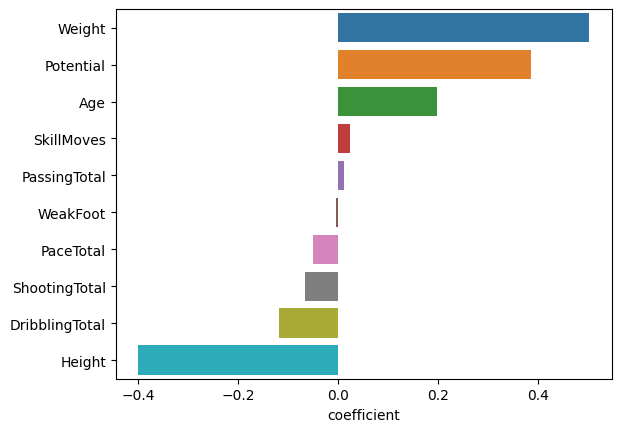

In [39]:
sns.barplot(x=coeff_graf['coefficient'], y=coeff_graf.index)


In [78]:
predictions = modelo_lm.predict(X_test)
predictions

array([0.44232052, 0.3744171 , 0.45667795, ..., 0.62382554, 0.41160007,
       0.18699486])

In [79]:
modelo_lm.score(X_test, y_test)

0.9411714409438203

In [80]:
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("MAE:", metrics.mean_absolute_error(y_test, predictions))

MSE: 0.0013271471802569572
RMSE: 0.03643003129640376
MAE: 0.028282694844500036


In [67]:
intercept = modelo_lm.intercept_
features = pd.DataFrame(modelo_lm.coef_, X_train.columns, columns=['coefficient'])
features.sort_values('coefficient', ascending=False)

,coefficient
Weight,0.501865
Potential,0.384399
Reactions,0.224573
BallControl,0.205525
Age,0.197993
...,...
Interceptions,-0.053215
ShootingTotal,-0.066551
DribblingTotal,-0.118143
Height,-0.398915


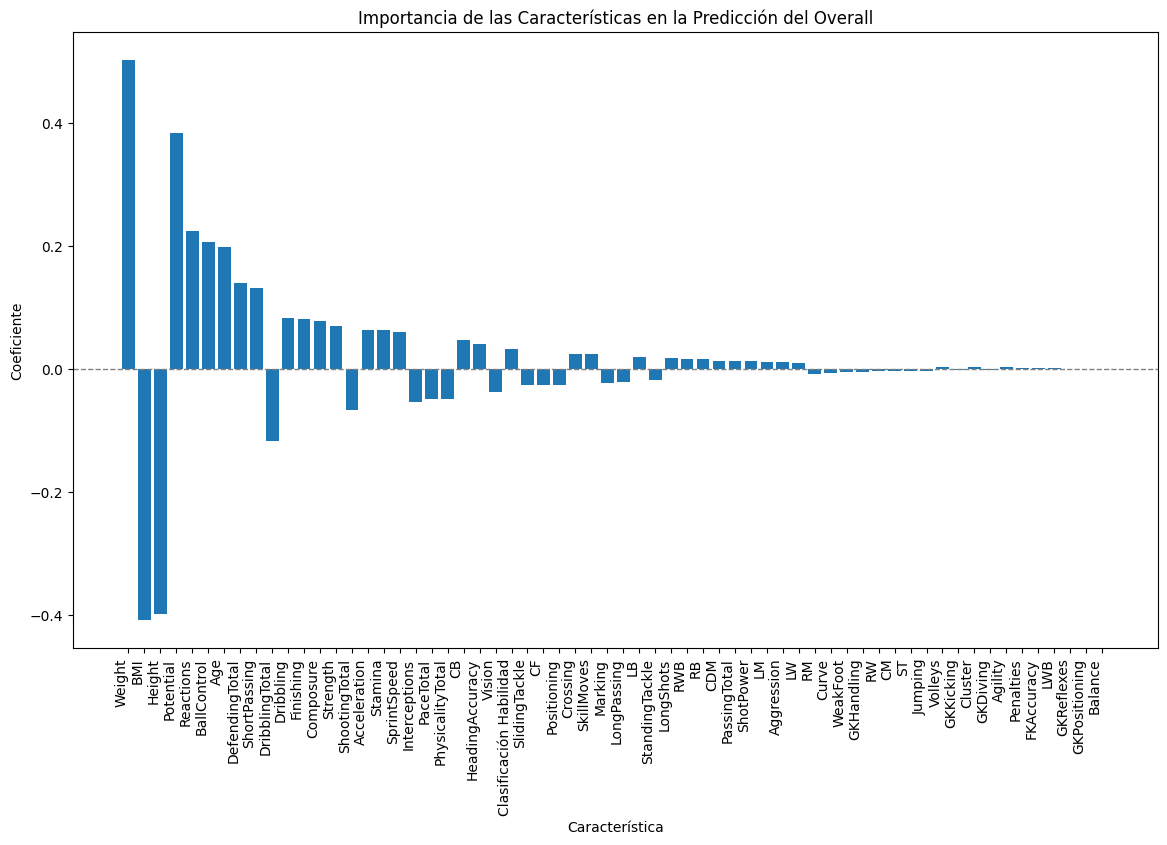

In [66]:
# Calcular el valor absoluto de los coeficientes para tener una magnitud de importancia
features['absolute_coefficient'] = abs(features['coefficient'])

# Ordenar las características por importancia en orden descendente
features = features.sort_values('absolute_coefficient', ascending=False)

# Gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(features.index, features['coefficient'])
plt.axhline(0, color='gray', linewidth=1, linestyle='dashed')  # Línea en y=0 para referencia
plt.xlabel('Característica')
plt.ylabel('Coeficiente')
plt.title('Importancia de las Características en la Predicción del Overall')
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()


In [81]:
modelo_dtree = DecisionTreeRegressor()
modelo_dtree.fit(X_train, y_train)
y_pred = modelo_dtree.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 0.0013078878415969544
RMSE: 0.03616473201334353
MAE: 0.024684844782584592
R2: 0.9420251511868121


In [82]:
modelo_KNN = KNeighborsRegressor(n_neighbors=5) 
modelo_KNN.fit(X_train, y_train)
y_pred = modelo_KNN.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 0.0016795867263740868
RMSE: 0.040982761331736624
MAE: 0.03150163825179097
R2: 0.9255488250343548


In [83]:
modelo_KNN.score(X_test, y_test)

0.9255488250343548

In [84]:
modelo_SVM = SVR()
modelo_SVM.fit(X_train, y_train)
y_pred = modelo_SVM.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 0.0013318014601366062
RMSE: 0.03649385510105237
MAE: 0.029471208543893367
R2: 0.9409651303078659


In [51]:
modelo_SVM.score(X_test, y_test)

0.9349739736681186

In [85]:
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 0.0004734689508373011
RMSE: 0.021759341691266792
MAE: 0.015581648803243186
R2: 0.979012504001096


In [86]:
modelo_rf.feature_importances_

array([9.83639917e-03, 4.73915627e-04, 4.62917505e-04, 5.02728081e-02,
       1.25955093e-04, 8.40374246e-05, 2.23142778e-03, 6.38492751e-03,
       1.97791496e-03, 1.61202978e-02, 6.43509535e-02, 7.46220431e-03,
       1.20357418e-02, 1.35062988e-03, 1.71815495e-03, 1.94122889e-03,
       6.45563883e-04, 3.23812604e-03, 7.45505686e-04, 5.87039449e-04,
       7.86455445e-04, 6.51822551e-02, 1.30059971e-03, 1.99017502e-03,
       6.32704263e-04, 7.14560030e-01, 5.16891575e-04, 1.10301908e-03,
       7.72025183e-04, 4.38548366e-03, 1.14103348e-03, 1.26975108e-03,
       1.15355972e-03, 1.17577366e-03, 7.56452696e-03, 8.03273136e-04,
       6.09775393e-04, 2.14898497e-03, 8.59946511e-04, 3.42378263e-03,
       1.66522594e-03, 4.64544171e-04, 4.62220989e-04, 4.35342511e-04,
       4.94543041e-04, 4.71363732e-04, 8.07026217e-04, 1.59337207e-04,
       3.19099010e-05, 2.05008402e-06, 4.57372069e-05, 2.67033418e-05,
       2.42934514e-05, 3.31564342e-06, 9.26230606e-06, 3.42581710e-05,
      

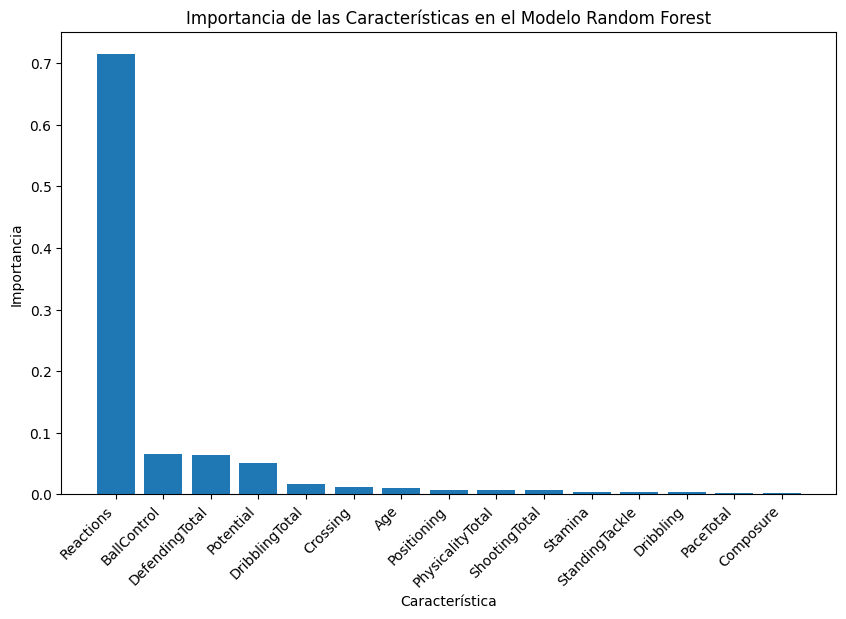

In [87]:
# Obtener la importancia de las características del modelo Random Forest
importancia_caracteristicas = modelo_rf.feature_importances_

# Crear un DataFrame para facilitar la visualización
caracteristicas_df = pd.DataFrame({'Característica': X_train.columns, 'Importancia': importancia_caracteristicas})

# Ordenar las características por importancia en orden descendente
caracteristicas_df = caracteristicas_df.sort_values('Importancia', ascending=False).head(15)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(caracteristicas_df['Característica'], caracteristicas_df['Importancia'])
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()


In [89]:
# Definir las características (X) y el objetivo (y)
X = fifa.drop(columns=['Overall','Name','Clasificación Habilidad'])
y = fifa['Overall']

# Inicializar los modelos
models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'SVR': SVR(),
    'LinearSVR': LinearSVR(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    
}

# Realizar validación cruzada y obtener la puntuación de rendimiento para cada modelo
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores) ** 0.5
    mean_rmse = rmse_scores.mean()
    print(f'{model_name} - Mean RMSE: {mean_rmse:.2f}')


Random Forest Regressor - Mean RMSE: 0.07
SVR - Mean RMSE: 0.06
LinearSVR - Mean RMSE: 0.04
KNeighbors Regressor - Mean RMSE: 0.09
Decision Tree Regressor - Mean RMSE: 0.08
Linear Regression - Mean RMSE: 0.04
Gradient Boosting - Mean RMSE: 0.06
XGBoost - Mean RMSE: 0.06


In [90]:
# Función que aplica GridSearchCV al modelo especificado
def tune_hyperparameters(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_rmse = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_mean = cv_rmse.mean()
    return best_model, best_params, cv_rmse_mean

# Los modelos y los hiperparámetros
models = {
    'SVR': (SVR(), {
        'C': [1, 10, 100],
        'kernel': ['linear', 'rbf']
    }),
    'LinearSVR': (LinearSVR(), {
        'C': [0.1, 1, 10]
    }),
    'Linear Regression': (LinearRegression(), {}),
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10]
    }),
    'Gradient Boosting': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    'KNN': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    'Decision Tree': (DecisionTreeRegressor(), {
        'max_depth': [None, 5, 10]
    }),
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
}

# Aplicar GridSearchCV a cada modelo y obtener el mejor modelo con hiperparámetros ajustados
best_models = {}
for model_name, (model, param_grid) in models.items():
    best_model, best_params, cv_rmse_mean = tune_hyperparameters(model, param_grid)
    best_models[model_name] = {
        'best_model': best_model,
        'best_params': best_params,
        'cv_rmse_mean': cv_rmse_mean
    }

# Evaluar cada modelo con los mejores hiperparámetros utilizando el RMSE
for model_name, model_info in best_models.items():
    model = model_info['best_model']
    best_params = model_info['best_params']
    cv_rmse_mean = model_info['cv_rmse_mean']

    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"{model_name}:")
    print(f"  Mejores hiperparámetros: {best_params}")
    print(f"  RMSE con mejores hiperparámetros: {rmse:.2f}")
    print(f"  CV RMSE promedio: {cv_rmse_mean:.2f}")


SVR:
  Mejores hiperparámetros: {'C': 1, 'kernel': 'rbf'}
  RMSE con mejores hiperparámetros: 0.04
  CV RMSE promedio: -0.00
LinearSVR:
  Mejores hiperparámetros: {'C': 0.1}
  RMSE con mejores hiperparámetros: 0.04
  CV RMSE promedio: -0.00
Linear Regression:
  Mejores hiperparámetros: {}
  RMSE con mejores hiperparámetros: 0.04
  CV RMSE promedio: -0.00
Random Forest:
  Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 200}
  RMSE con mejores hiperparámetros: 0.02
  CV RMSE promedio: -0.00
Gradient Boosting:
  Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
  RMSE con mejores hiperparámetros: 0.02
  CV RMSE promedio: -0.00
KNN:
  Mejores hiperparámetros: {'n_neighbors': 7, 'weights': 'distance'}
  RMSE con mejores hiperparámetros: 0.04
  CV RMSE promedio: -0.00
Decision Tree:
  Mejores hiperparámetros: {'max_depth': 10}
  RMSE con mejores hiperparámetros: 0.03
  CV RMSE promedio: -0.00
XGBoost:
  Mejores hiperparámetros: {'learning_rate'

In [91]:
model_GBRegressor = GradientBoostingRegressor(learning_rate= 0.1,max_depth=7, n_estimators=200)

# Entrenar el modelo con los datos de entrenamiento
model_GBRegressor.fit(X_train, y_train)

# Guardar el modelo en un archivo
model_path = "src/model/My_model.pkl"
with open(model_path, "wb") as f:
    pickle.dump(model_GBRegressor, f)

In [92]:
X = fifa.drop(columns=['Overall', 'Name','Clasificación Habilidad'])
y = fifa['Overall']

# Cargar el mejor modelo desde el archivo
best_model = joblib.load('src/model/My_model.pkl')

# Realizar la validación cruzada con 5 pliegues
cv_scores = cross_val_score(best_model, X, y, cv=9, scoring='neg_mean_squared_error')

# Obtener la raíz cuadrada del error cuadrático medio (RMSE) promedio
mean_rmse = (-cv_scores.mean()) ** 0.5

print(f'Mean RMSE: {mean_rmse:.2f}')


In [67]:
best_model.predict(X_test)

array([0.40928931, 0.36744699, 0.50534183, ..., 0.67753689, 0.40614074,
       0.19513323])

In [68]:
best_model.feature_names_in_

array(['Age', 'Height', 'Weight', 'Potential', 'WeakFoot', 'SkillMoves',
       'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
       'DefendingTotal', 'PhysicalityTotal', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'BMI',
       'CB', 'CDM', 'CF', 'CM', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW',
       'RWB', 'ST', 'Clasificación Habilidad', 'Cluster'], dtype=object)

In [80]:


model_path = "C:\JUAN BOOTCAMP\Proyecto_Ml\src\model\My_model.pkl"

# Verificar si el archivo existe
if os.path.exists(model_path):
    print("El archivo My_model.pkl existe en la ruta especificada.")
else:
    print("El archivo My_model.pkl no existe en la ruta especificada.")

# Cargar el modelo
with open(model_path, "rb") as f:
    model = pickle.load(f)

# Verificar el tipo del modelo
print("Tipo de modelo cargado:", type(model))

# Verificar los métodos disponibles en el modelo
print("Métodos disponibles en el modelo:", dir(model))


El archivo My_model.pkl existe en la ruta especificada.
Tipo de modelo cargado: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Métodos disponibles en el modelo: ['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', 

In [66]:
fifa

,Name,Age,Height,Weight,Overall,Potential,WeakFoot,SkillMoves,PaceTotal,ShootingTotal,...,LM,LW,LWB,RB,RM,RW,RWB,ST,Clasificación Habilidad,Cluster
0,L. Messi,0.76,0.274510,0.339623,91,0.914894,0.75,0.666667,0.768116,0.960526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,K. Benzema,0.72,0.588235,0.603774,91,0.914894,0.75,0.666667,0.753623,0.947368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12
2,R. Lewandowski,0.68,0.588235,0.603774,91,0.914894,0.75,0.666667,0.681159,0.986842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
3,K. De Bruyne,0.60,0.509804,0.396226,91,0.914894,1.00,0.666667,0.666667,0.947368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4,K. Mbappé,0.28,0.529412,0.452830,91,1.000000,0.75,1.000000,1.000000,0.960526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16362,D. Collins,0.20,0.372549,0.358491,47,0.170213,0.50,0.000000,0.579710,0.421053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16363,Yang Dejiang,0.04,0.392157,0.207547,47,0.191489,0.50,0.000000,0.391304,0.276316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
16364,L. Mullan,0.08,0.294118,0.301887,47,0.404255,0.50,0.000000,0.521739,0.315789,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
16365,D. McCallion,0.04,0.450980,0.301887,47,0.276596,0.50,0.000000,0.347826,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
